In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão de Python Neste Jupyter Notebook:', python_version())

# usaremos o filtro 'warning' para deixar mais limpo.
import warnings
warnings.filterwarnings('ignore')

### One-Dimensional Data Example

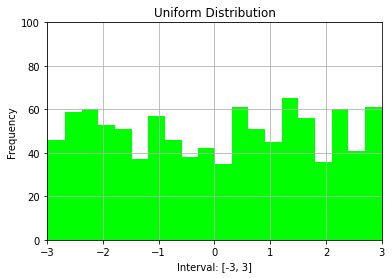

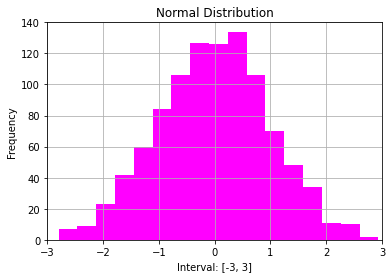

In [1]:
import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__": 
    plt.figure('Uniform Distribution')  
    uniform = np.random.uniform(-3, 3, 1000)  
    count, bins, ignored = plt.hist(uniform, 20, facecolor='lime')
    
    plt.xlabel('Interval: [-3, 3]') 
    plt.ylabel('Frequency')  
    plt.title('Uniform Distribution')
    plt.axis([-3,3,0,100]) 
    plt.grid(True)    
    plt.figure('Normal Distribution')  
    
    normal = np.random.normal(0, 1, 1000)
    count, bins, ignored = plt.hist(normal, 20,facecolor='fuchsia') 
    
    plt.xlabel('Interval: [-3, 3]')    
    plt.ylabel('Frequency')  
    plt.title('Normal Distribution')   
    plt.axis([-3,3,0,140])  
    plt.grid(True)  
    plt.show()

### Two-Dimensional Data Example

0.8925232981441724
-0.8874801837531907


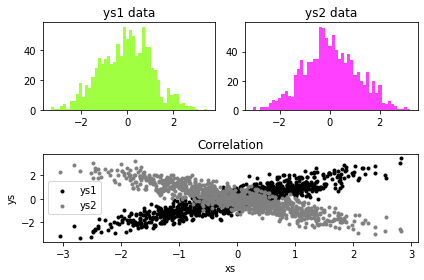

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np, random
from scipy.special import ndtri

def inverse_normal_cdf(r): 
    return ndtri(r)

def random_normal():
    return inverse_normal_cdf(random.random())

def scatter(loc):  
    plt.scatter(xs, ys1, marker='.', color='black', label='ys1') 
    plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')  
    plt.xlabel('xs')   
    plt.ylabel('ys')   
    plt.legend(loc=loc) 
    plt.tight_layout()

if __name__ == "__main__":   
    xs = [random_normal() for _ in range(1000)] 
    ys1 = [ x + random_normal() / 2 for x in xs] 
    ys2 = [-x + random_normal() / 2 for x in xs] 
    gs = gridspec.GridSpec(2, 2) 
    fig = plt.figure() 
       
    ax1 = fig.add_subplot(gs[0,0])  
    plt.title('ys1 data')  
    n, bins, ignored = plt.hist(ys1, 50, facecolor='chartreuse', alpha=0.75)
    
    ax2 = fig.add_subplot(gs[0,1])
    plt.title('ys2 data')
    n, bins, ignored = plt.hist(ys2, 50, facecolor='fuchsia', alpha=0.75)   
    
    ax3 = fig.add_subplot(gs[1,:]) 
    plt.title('Correlation')    
    scatter(6)   
    print (np.corrcoef(xs, ys1)[0, 1])  
    print (np.corrcoef(xs, ys2)[0, 1]) 
    plt.show()

### Data Correlation and Basic Statistics

highly positive:
 [[1.         0.82777267]
 [0.82777267 1.        ]]

highly negative:
 [[ 1.        -0.8350955]
 [-0.8350955  1.       ]]

no/weak:
 [[1.         0.00962676]
 [0.00962676 1.        ]]


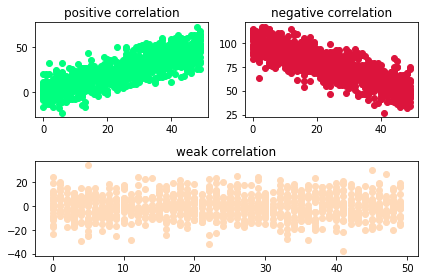

In [4]:
import random, numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

if __name__ == "__main__":
    np.random.seed(0)
    x = np.random.randint(0, 50, 1000) 
    y = x + np.random.normal(0, 10, 1000)
    print ('highly positive:\n', np.corrcoef(x, y)) 
    gs = gridspec.GridSpec(2, 2)  
    fig = plt.figure()  
    
    ax1 = fig.add_subplot(gs[0,0])  
    plt.title('positive correlation')   
    plt.scatter(x, y, color='springgreen')
    y = 100 - x + np.random.normal(0, 10, 1000)   
    print ('\nhighly negative:\n', np.corrcoef(x, y))
    
    ax2 = fig.add_subplot(gs[0,1]) 
    plt.title('negative correlation') 
    plt.scatter(x, y, color='crimson')
    y = np.random.normal(0, 10, 1000)    
    print ('\nno/weak:\n', np.corrcoef(x, y))  
    
    ax3 = fig.add_subplot(gs[1,:])  
    plt.title('weak correlation')
    plt.scatter(x, y, color='peachpuff')
    plt.tight_layout() 
    plt.show()

### Pandas Correlation and Heat Map Example

          a         b         c         d
a  1.000000  0.827773 -0.948242 -0.030448
b  0.827773  1.000000 -0.785301 -0.011704
c -0.948242 -0.785301  1.000000  0.032838
d -0.030448 -0.011704  0.032838  1.000000


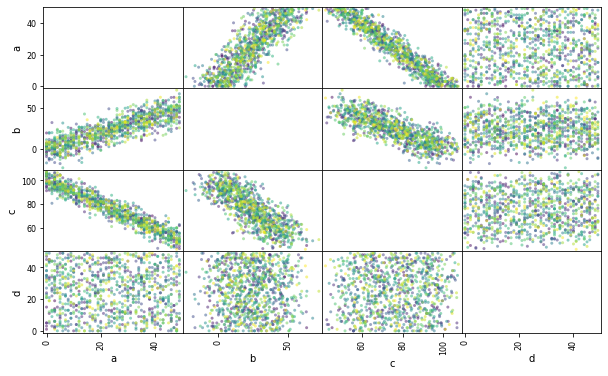

In [5]:
import random, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

if __name__ == "__main__":
    np.random.seed(0) 
    df = pd.DataFrame({'a': np.random.randint(0, 50, 1000)})  
    df['b'] = df['a'] + np.random.normal(0, 10, 1000)  
    df['c'] = 100 - df['a'] + np.random.normal(0, 5, 1000)   
    df['d'] = np.random.randint(0, 50, 1000)  
    colormap = cm.viridis 
    colorlist = [colors.rgb2hex(colormap(i))  
                 for i in np.linspace(0, 1, len(df['a']))]   
    df['colors'] = colorlist  
    print (df.corr())    
    pd.plotting.scatter_matrix( df, c=df['colors'],
                               diagonal='d', figsize=(10, 6))  
    plt.show()

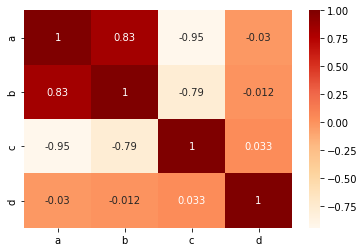

In [6]:
import random, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if __name__ == "__main__":  
    np.random.seed(0)
    df = pd.DataFrame({'a': np.random.randint(0, 50, 1000)})   
    df['b'] = df['a'] + np.random.normal(0, 10, 1000) 
    df['c'] = 100 - df['a'] + np.random.normal(0, 5, 1000)
    df['d'] = np.random.randint(0, 50, 1000)
    plt.figure() 
    sns.heatmap(df.corr(), annot=True, cmap='OrRd') 
    plt.show()

### Various Visualization Examples

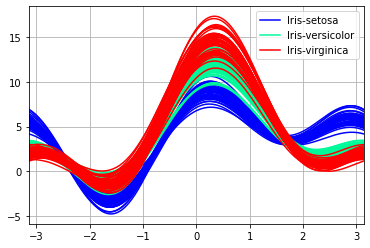

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import andrews_curves

if __name__ == "__main__": 
    data = pd.read_csv('data/iris.csv') 
    plt.figure()  
    andrews_curves(data, 'Name',  
                   color=['b','mediumspringgreen','r']) 
    plt.show()

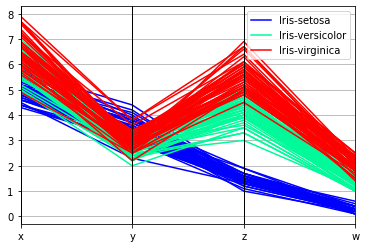

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates

if __name__ == "__main__":    
    data = pd.read_csv('data/iris.csv') 
    plt.figure()   
    parallel_coordinates(data, 'Name',
                         color=['b','mediumspringgreen','r'])    
plt.show()

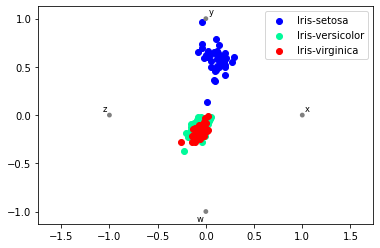

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import radviz

if __name__ == "__main__": 
    data = pd.read_csv('data/iris.csv')
    plt.figure()  
    radviz(data, 'Name',  
           color=['b','mediumspringgreen','r'])   
    plt.show()

### Cleaning a CSV File with Pandas and JSON

In [ ]:
import csv, pandas as pd, json

def to_dict(d):
    return [dict(row) for row in d]

def dump_json(f, d):
    with open(f, 'w') as f: 
        json.dump(d, f)
        
def read_json(f): 
    with open(f) as f:   
        return json.load(f)

if __name__ == "__main__":   
    df = pd.read_csv("data/audio.csv")
    print (df, '\n') 
    data = csv.DictReader(open('data/audio.csv')) 
    d = to_dict(data)    
    for row in d:  
        if (row['pno'][0] not in ['a', 'c', 'p', 's']):
            
            if (row['pno'][0] == '8'):   
                row['pno'] = 'a' + row['pno']  
            
            elif (row['pno'][0] == '7'): 
                row['pno'] = 'p' + row['pno']  
            
            elif (row['pno'][0] == '5'):
                row['pno'] = 's' + row['pno']
        
        if (row['color']) == '-':
            row['color'] = 'silver' 
        
        if row['model'] == '-': 
            row['model'] = 'S1'   
        
        if (row['mfg']) == '100':  
            row['mfg'] = 'Linn'  
        
        if (row['desc'] == '0') and row['pno'][0] == 'p': 
            row['desc'] = 'preamplifier'  
            
        elif (row['desc'] == '-') and row['pno'][0] == 's': 
            row['desc'] = 'speakers' 
        
        if (row['price'][0] == '$'):  
            row['price'] =\ 
            row['price'].translate({ord(i): None for i in '$,.'})   
    
    json_file = 'data/audio.json'
    dump_json(json_file, d)  
    data = read_json(json_file)   
    for i, row in enumerate(data): 
        if i < 5:    
            print (row)


### Slicing and Dicing

In [ ]:
import pandas as pd

if __name__ == "__main__": 
    
    df = pd.read_json("data/audio.json")
    amps = df[df.desc == 'amplifier']  
    print (amps, '\n')  
    
    price = df.query('price >= 40000')
    print (price, '\n')    
    
    between = df.query('4999 < price < 6000')   
    print (between, '\n')
    
    row = df.loc[[0, 10, 19]]    
    print (row)

### Data Cubes

### Data Scaling and Wrangling

In [ ]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

### End.